In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


11493376/11490434 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28, 1)
Number of images in train_images:  60000
Number of images in test_images:  10000
Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2431 - accuracy: 0.9282 - val_loss: 0.0937 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.0717 - val_accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0773 - accuracy: 0.9760 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0612 - accuracy: 0.9811 - val_loss: 0.0590 - val_accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0526 - accuracy: 0.9827 - val_loss: 0.0628 - val_accuracy: 0.9819
{'loss': [0.2430630475282669, 0.10827498137950897, 0.07733601331710815, 0.0612443275749683

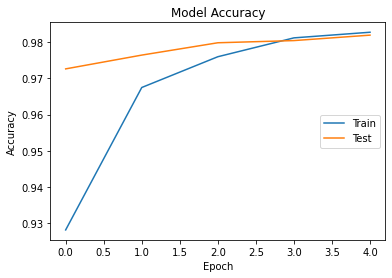

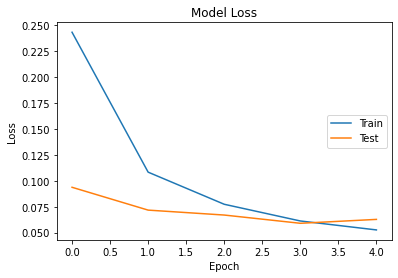

313/313 [==============================] - 2s 6ms/step - loss: 0.0628 - accuracy: 0.9819
8


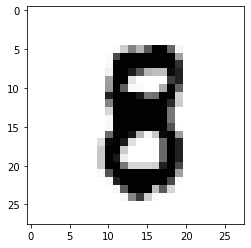

In [ ]:
import tensorflow as tf

# Downloading the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1) # Ukuran 28px x 28px 

# Making sure that the values are float so that we can get decimal points after division
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
train_images /= 255
test_images /= 255
print('train_images shape:', train_images.shape)
print('Number of images in train_images: ', train_images.shape[0])
print('Number of images in test_images: ', test_images.shape[0])

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential() # Initiate The CNN
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) # Hidden Layer
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) # Output

# Compiling and Fitting the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=train_images,y=train_labels,validation_data=(test_images, test_labels), epochs=5)
print(history.history)

# Display Model Training History
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy').set_color('Black')
plt.ylabel('Accuracy').set_color('Black')
plt.xlabel('Epoch').set_color('Black')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss').set_color('Black')
plt.ylabel('Loss').set_color('Black')
plt.xlabel('Epoch').set_color('Black')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

# Evaluating the Model
model.evaluate(test_images, test_labels)

# Making a Prediction
image_index = 6001
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())